In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [117]:
dataset = pd.read_excel("Sales_Forecasting.xlsx")

In [118]:
dataset.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,NaN,Bombay (Mumbai),1,1,2005,72.2
1,Asia,India,NaN,Bombay (Mumbai),1,2,2005,72.7
2,Asia,India,NaN,Bombay (Mumbai),1,3,2005,74.3
3,Asia,India,NaN,Bombay (Mumbai),1,4,2005,78.9
4,Asia,India,NaN,Bombay (Mumbai),1,5,2005,81.5


In [119]:
dataset.tail()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
17531,Asia,India,NaN,Delhi,12,27,2016,61.3
17532,Asia,India,NaN,Delhi,12,28,2016,61.7
17533,Asia,India,NaN,Delhi,12,29,2016,59.3
17534,Asia,India,NaN,Delhi,12,30,2016,57.1
17535,Asia,India,NaN,Delhi,12,31,2016,58.3


In [120]:
dataset.describe()

,State_of_outlet,Month,Day,Year,Total_Sales
count,0.0,17536.000000,17536.000000,17536.000000,17536.000000
mean,NaN,6.524179,15.732892,2010.502053,80.117963
std,NaN,3.449400,8.801978,3.452525,13.315486
min,NaN,1.000000,1.000000,2005.000000,-99.000000
25%,NaN,4.000000,8.000000,2008.000000,77.500000
50%,NaN,7.000000,16.000000,2011.000000,82.600000
75%,NaN,10.000000,23.000000,2014.000000,86.100000
max,NaN,12.000000,31.000000,2016.000000,102.500000


In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HQ               17536 non-null  object 
 1   Country          17536 non-null  object 
 2   State_of_outlet  0 non-null      float64
 3   City_of_outlet   17536 non-null  object 
 4   Month            17536 non-null  int64  
 5   Day              17536 non-null  int64  
 6   Year             17536 non-null  int64  
 7   Total_Sales      17536 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [122]:
from datetime import datetime
dataset['Date'] = dataset.apply(lambda  row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", '%Y-%m-%d'), axis=1)

In [123]:
dataset['Date'].min(), dataset['Date'].max()

(Timestamp('2005-01-01 00:00:00'), Timestamp('2016-12-31 00:00:00'))

In [124]:
cols = ['Month','Day','Year','City_of_outlet','State_of_outlet','Country','HQ']
dataset.drop(cols, axis=1, inplace=True)
dataset = dataset.sort_values('Date')

In [125]:

cols = ['Month','Day','Year','City_of_outlet','State_of_outlet','Country','HQ'] 
dataset.drop(cols, axis=1, inplace=True) 
dataset = dataset.sort_values('Date')

KeyError: "['Month' 'Day' 'Year' 'City_of_outlet' 'State_of_outlet' 'Country' 'HQ'] not found in axis"

In [126]:

Sales_y.index

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [127]:
dataset.isnull()

,Total_Sales,Date
0,False,False
730,False,False
1095,False,False
365,False,False
1,False,False
...,...,...
16802,False,False
17169,False,False
16437,False,False
16803,False,False


In [128]:
dataset.groupby('Date')['Total_Sales'].sum().reset_index()

,Date,Total_Sales
0,2005-01-01,275.5
1,2005-01-02,275.5
2,2005-01-03,278.6
3,2005-01-04,279.3
4,2005-01-05,281.4
...,...,...
4378,2016-12-27,288.4
4379,2016-12-28,283.3
4380,2016-12-29,281.7
4381,2016-12-30,282.0


In [129]:
Sales_y= dataset.set_index('Date')

In [130]:
Sales_y.index

DatetimeIndex(['2005-01-01', '2005-01-01', '2005-01-01', '2005-01-01',
               '2005-01-02', '2005-01-02', '2005-01-02', '2005-01-02',
               '2005-01-03', '2005-01-03',
               ...
               '2016-12-29', '2016-12-29', '2016-12-30', '2016-12-30',
               '2016-12-30', '2016-12-30', '2016-12-31', '2016-12-31',
               '2016-12-31', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=17536, freq=None)

In [131]:
Sales=Sales_y.copy()

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataset_oil=scaler.fit_transform(np.array(dataset_oil).reshape(-1,1))

NameError: name 'dataset_oil' is not defined

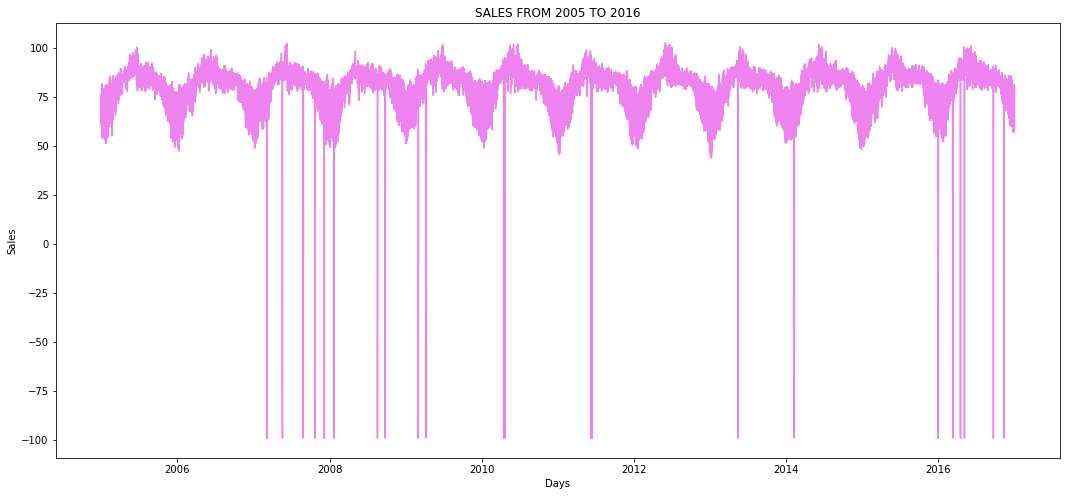

In [133]:
plt.plot(Sales_y, color = 'violet')
plt.title('SALES FROM 2005 TO 2016')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

In [134]:
monthly_sales = Sales_y['Total_Sales'].resample('MS').mean()

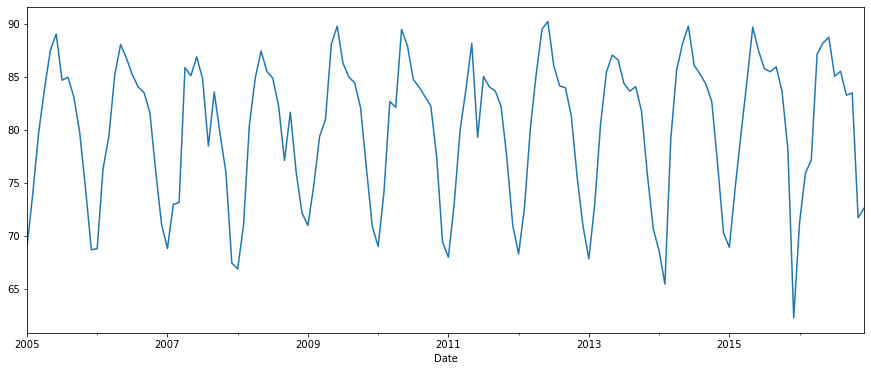

In [135]:
monthly_sales.plot(figsize=(15,6))
plt.show()

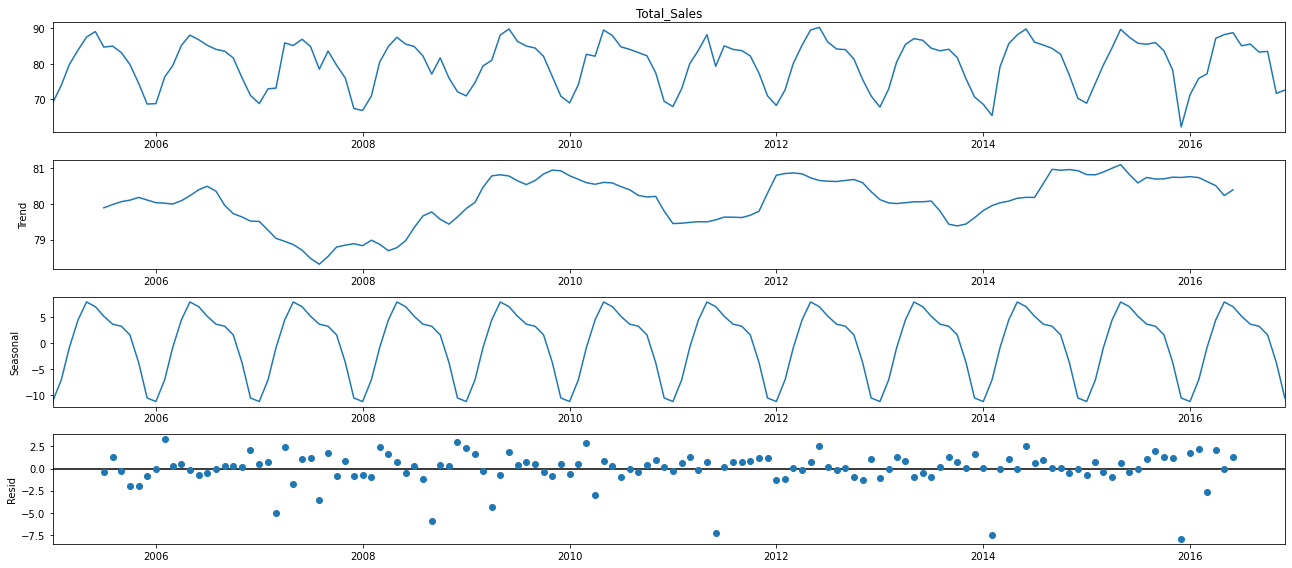

In [136]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(monthly_sales , model='additive')
fig = decomposition.plot()
plt.show()

In [224]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Sales_y=scaler.fit_transform(np.array(Sales_y).reshape(-1,1))

In [138]:
import pickle
pickle.dump(scaler,open("Scaler_forecast.pkl","wb"))

In [139]:
training_size=int(len(Sales_y)*0.63)
test_size=len(Sales_y)-training_size
train_dataset,test_dataset=Sales_y[0:training_size,:],Sales_y[training_size:len(Sales_y),:1]

In [140]:
training_size,test_size

(11047, 6489)

In [141]:
train_dataset.shape

(11047, 1)

In [142]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [143]:
time_step = 10
X_train, y_train = create_dataset(train_dataset, time_step)
X_test, ytest = create_dataset(test_dataset, time_step)

In [144]:
print(X_train.shape), print(y_train.shape)

(11036, 10)
(11036,)


(None, None)

In [145]:
print(X_test.shape), print(ytest.shape)

(6478, 10)
(6478,)


(None, None)

In [146]:
X_train

array([[0.84962779, 0.8674938 , 0.79404467, ..., 0.77617866, 0.85260546,
        0.8764268 ],
       [0.8674938 , 0.79404467, 0.82133995, ..., 0.85260546, 0.8764268 ,
        0.86004963],
       [0.79404467, 0.82133995, 0.85210918, ..., 0.8764268 , 0.86004963,
        0.75880893],
       ...,
       [0.91116625, 0.93647643, 0.90471464, ..., 0.94342432, 0.9235732 ,
        0.9325062 ],
       [0.93647643, 0.90471464, 0.91662531, ..., 0.9235732 , 0.9325062 ,
        0.90769231],
       [0.90471464, 0.91662531, 0.90818859, ..., 0.9325062 , 0.90769231,
        0.93101737]])

In [147]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [1]:
import tensorflow

In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow-gpu

In [ ]:
pip install keras

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [38]:
model=Sequential

In [39]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

TypeError: add() missing 1 required positional argument: 'layer'

In [5]:
pip install tensorflow


  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\h5py-2.10.0.dist-info\\AUTHORS'
Consider using the `--user` option or check the permissions.




  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
pip install tensorflow

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
pip install tensorflow

In [1]:
pip install Tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement Tensorflow
ERROR: No matching distribution found for Tensorflow


In [ ]:
pip install Tensorflow

In [2]:
C:\Users\eeksh>conda create -n tensorflow_env tensorflow

ModuleNotFoundError: No module named 'Tensorflow'

In [ ]:
pip install Tensorflow

In [ ]:
conda create -n tensorflow_env tensorflow

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
conda create -n tensorflow_env tensorflow

In [ ]:
conda activate tensorflow_env

In [ ]:
pip install tensorflow

In [ ]:
conda create -n tensorflow_env tensorflow

In [ ]:
X_train

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [150]:
model= Sequential()

In [192]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [152]:
model.add(Dense(1))

In [153]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 50)            10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [154]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [64]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
173/173 [==============================] - 16s 36ms/step - loss: 0.0308 - val_loss: 0.0038
Epoch 2/200
173/173 [==============================] - 4s 25ms/step - loss: 0.0035 - val_loss: 0.0039
Epoch 3/200
173/173 [==============================] - 4s 25ms/step - loss: 0.0035 - val_loss: 0.0039
Epoch 4/200
173/173 [==============================] - 4s 25ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 5/200
173/173 [==============================] - 4s 25ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 6/200
173/173 [==============================] - 4s 25ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 7/200
173/173 [==============================] - 4s 25ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 8/200
173/173 [==============================] - 4s 25ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 9/200
173/173 [==============================] - 4s 26ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 10/200
173/173 [==============================] - 4s 25ms/step - loss: 0.00

173/173 [==============================] - 4s 23ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 160/200
173/173 [==============================] - 4s 24ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 161/200
173/173 [==============================] - 4s 23ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 162/200
173/173 [==============================] - 4s 23ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 163/200
173/173 [==============================] - 4s 24ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 164/200
173/173 [==============================] - 4s 24ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 165/200
173/173 [==============================] - 4s 24ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 166/200
173/173 [==============================] - 4s 24ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 167/200
173/173 [==============================] - 4s 24ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 168/200
173/173 [==============================] - 4s 24ms/step - loss: 

In [107]:
X_train

array([[[0.84962779],
        [0.8674938 ],
        [0.79404467],
        ...,
        [0.77617866],
        [0.85260546],
        [0.8764268 ]],

       [[0.8674938 ],
        [0.79404467],
        [0.82133995],
        ...,
        [0.85260546],
        [0.8764268 ],
        [0.86004963]],

       [[0.79404467],
        [0.82133995],
        [0.85210918],
        ...,
        [0.8764268 ],
        [0.86004963],
        [0.75880893]],

       ...,

       [[0.91116625],
        [0.93647643],
        [0.90471464],
        ...,
        [0.94342432],
        [0.9235732 ],
        [0.9325062 ]],

       [[0.93647643],
        [0.90471464],
        [0.91662531],
        ...,
        [0.9235732 ],
        [0.9325062 ],
        [0.90769231]],

       [[0.90471464],
        [0.91662531],
        [0.90818859],
        ...,
        [0.9325062 ],
        [0.90769231],
        [0.93101737]]])

93.23669844194623

In [156]:
from tensorflow.keras.models import load_model

In [157]:
model.save("sales_forecast.h5")

In [158]:
def predict():
    look_back=10
    trainPredictPlot = np.empty_like(Sales_y)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    testPredictPlot = np.empty_like(Sales_y)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(Sales_y)-1, :] = test_predict
    plt.plot(scaler.inverse_transform(Sales_y))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()

In [159]:
len(Sales)

17536

In [160]:
X_input=Sales[4372:4382].reshape(1,-1)
X_input.shape

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [161]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [162]:
from tensorflow.keras.models import load_model

In [163]:
model.save("sales_forecast.h5")

In [164]:
def predict():
    look_back=10
    trainPredictPlot = np.empty_like(Sales_y)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    testPredictPlot = np.empty_like(Sales_y)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(Sales_y)-1, :] = test_predict
    plt.plot(scaler.inverse_transform(Sales_y))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()

In [165]:
len(Sales)

17536

In [166]:
x_input=Sales[4372:4382].reshape(1,-1)
x_input.shape()

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [167]:
def reshape():
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

In [168]:
def reshape():
    temp_input

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(result)? (<ipython-input-69-d890455cbf91>, line 18)

In [169]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [170]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [171]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

97.45316233309372

In [172]:
math.sqrt(mean_squared_error(ytest,test_predict))

97.45149193238093

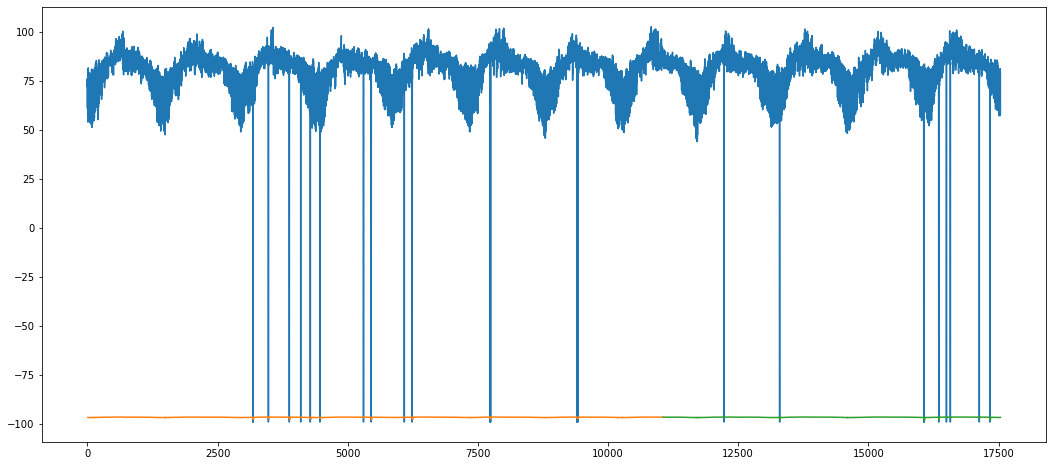

In [173]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(Sales_y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(Sales_y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Sales_y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(Sales_y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [174]:
model.save("sales_forecast.h5")

In [175]:
len(Sales)

17536

In [176]:
Sales=np.array(Sales)

In [177]:
x_input=Sales[4372:4382].reshape(1,-1)
x_input.shape

(1, 10)

In [178]:
x_input

array([[53.3, 62.1, 74.8, 77.1, 75.2, 78.1, 53.4, 61.1, 76.1, 50.2]])

In [184]:
len(test_dataset)

6489

In [185]:
x_input=test_dataset[1612:].reshape(1,-1)
x_input.shape

(1, 4877)

In [186]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [189]:
temp_input

[0.9186104218362282,
 0.9022332506203474,
 0.9186104218362282,
 0.9200992555831266,
 0.9245657568238212,
 0.9121588089330024,
 0.890818858560794,
 0.9032258064516129,
 0.9330024813895781,
 0.9086848635235731,
 0.9320099255583126,
 0.9091811414392059,
 0.9047146401985111,
 0.8992555831265509,
 0.9280397022332506,
 0.9091811414392059,
 0.927047146401985,
 0.9101736972704715,
 0.9012406947890819,
 0.9305210918114144,
 0.9245657568238212,
 0.9057071960297767,
 0.9086848635235731,
 0.9200992555831266,
 0.9017369727047146,
 0.9260545905707196,
 0.9091811414392059,
 0.896774193548387,
 0.9126550868486352,
 0.894789081885856,
 0.9146401985111663,
 0.8962779156327543,
 0.9002481389578163,
 0.8957816377171215,
 0.8972704714640198,
 0.9121588089330024,
 0.8957816377171215,
 0.8962779156327543,
 0.8957816377171215,
 0.9245657568238212,
 0.8987593052109181,
 0.894789081885856,
 0.8789081885856078,
 0.9305210918114144,
 0.9091811414392059,
 0.927047146401985,
 0.884863523573201,
 0.9205955334987592,

In [188]:
from numpy import array
lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>=10):
        x_input=np.array(temp_input[0:])
        print("{} day input {}".format(i,x_input))
        x_input=np.expand_dims(x_input, axis=0)
        x_input=scaler.transform(x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        yhat=scaler.inverse_transform(yhat)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        print("Please give 10 number of inputs")

0 day input [0.91861042 0.90223325 0.91861042 ... 0.88684864 0.82431762 0.78064516]


ValueError: X has 4877 features, but MinMaxScaler is expecting 1 features as input.

In [190]:
len(temp_input)

4877

In [193]:
from numpy import array
lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>=10):
        #print("temp_input",temp_input)
        x_input=np.array(temp_input[0:])
        print("{} day input {}".format(i,x_input))
        x_input=np.expand_dims(x_input, axis=0)
        x_input=scaler.transform(x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        yhat=scaler.inverse_transform(yhat)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        print("Please give 10 number of inputs")

0 day input [0.91861042 0.90223325 0.91861042 ... 0.88684864 0.82431762 0.78064516]


ValueError: X has 4877 features, but MinMaxScaler is expecting 1 features as input.

In [196]:
y_pred = model.predict(X_test,batch_size=1)

In [197]:
y_pred[0:5]

array([[0.00865376],
       [0.00861295],
       [0.00860143],
       [0.00861505],
       [0.00860534]], dtype=float32)

In [198]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

97.45316233309372

In [199]:
math.sqrt(mean_squared_error(ytest,test_predict))

97.45149193238093

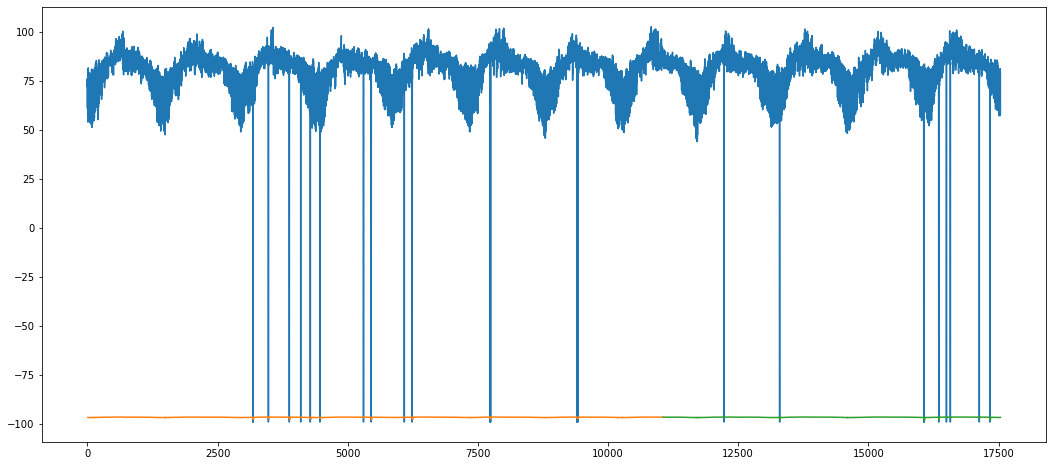

In [200]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(Sales_y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(Sales_y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Sales_y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(Sales_y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [201]:
model.save("sales_forecast.h5")

In [202]:
len(Sales)

17536

In [203]:
Sales=np.array(Sales)

In [204]:
x_input=Sales[4372:4382].reshape(1,-1)
x_input.shape

(1, 10)

In [205]:
x_input

array([[53.3, 62.1, 74.8, 77.1, 75.2, 78.1, 53.4, 61.1, 76.1, 50.2]])

In [206]:
len(test_dataset)

6489

In [207]:
x_input=test_dataset[1612:].reshape(1,-1)
x_input.shape

(1, 4877)

In [208]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [209]:
temp_input

[0.9186104218362282,
 0.9022332506203474,
 0.9186104218362282,
 0.9200992555831266,
 0.9245657568238212,
 0.9121588089330024,
 0.890818858560794,
 0.9032258064516129,
 0.9330024813895781,
 0.9086848635235731,
 0.9320099255583126,
 0.9091811414392059,
 0.9047146401985111,
 0.8992555831265509,
 0.9280397022332506,
 0.9091811414392059,
 0.927047146401985,
 0.9101736972704715,
 0.9012406947890819,
 0.9305210918114144,
 0.9245657568238212,
 0.9057071960297767,
 0.9086848635235731,
 0.9200992555831266,
 0.9017369727047146,
 0.9260545905707196,
 0.9091811414392059,
 0.896774193548387,
 0.9126550868486352,
 0.894789081885856,
 0.9146401985111663,
 0.8962779156327543,
 0.9002481389578163,
 0.8957816377171215,
 0.8972704714640198,
 0.9121588089330024,
 0.8957816377171215,
 0.8962779156327543,
 0.8957816377171215,
 0.9245657568238212,
 0.8987593052109181,
 0.894789081885856,
 0.8789081885856078,
 0.9305210918114144,
 0.9091811414392059,
 0.927047146401985,
 0.884863523573201,
 0.9205955334987592,

In [210]:
len(temp_input)

4877

In [211]:
from numpy import array
lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>=10):
        #print("temp_input",temp_input)
        x_input=np.array(temp_input[0:])
        print("{} day input {}".format(i,x_input))
        x_input=np.expand_dims(x_input, axis=0)
        x_input=scaler.transform(x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        yhat=scaler.inverse_transform(yhat)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        print("Please give 10 number of inputs")

0 day input [0.91861042 0.90223325 0.91861042 ... 0.88684864 0.82431762 0.78064516]


ValueError: X has 4877 features, but MinMaxScaler is expecting 1 features as input.

In [212]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [213]:
len(Sales_y)

17536

In [214]:

import jupyterthemes as jt
!jt -t monokai

ModuleNotFoundError: No module named 'jupyterthemes'

In [215]:
!jt -r

'jt' is not recognized as an internal or external command,
operable program or batch file.


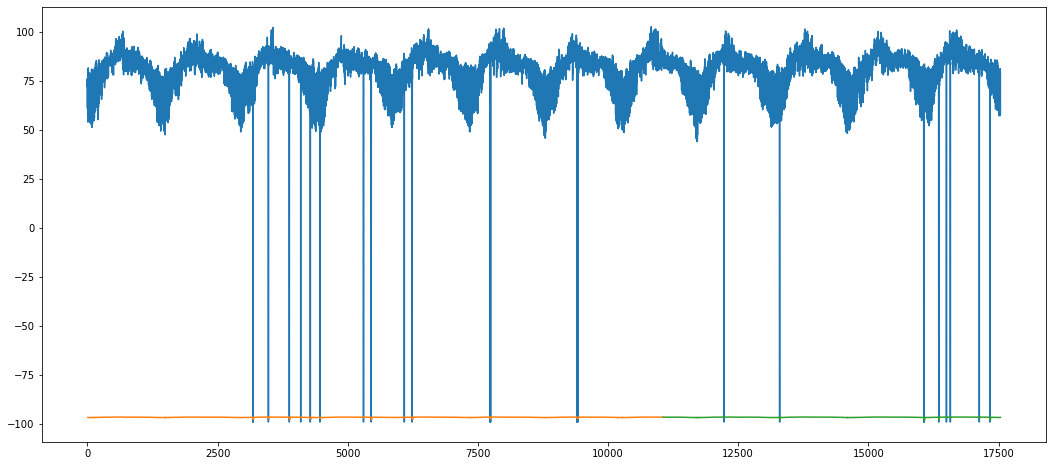

In [216]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(Sales_y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(Sales_y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Sales_y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(Sales_y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [217]:
len(Sales)

17536

In [218]:
x_input=Sales[4372:4382].reshape(1,-1)
x_input.shape

(1, 10)

In [219]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [220]:
temp_input

[53.3, 62.1, 74.8, 77.1, 75.2, 78.1, 53.4, 61.1, 76.1, 50.2]

In [223]:
from numpy import array
lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>=10):
        #print("temp_input",temp_input)
        x_input=np.array(temp_input[0:])
        print("{} day input {}".format(i,x_input))
        x_input=np.expand_dims(x_input, axis=0)
        x_input=scaler.transform(x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        yhat=scaler.inverse_transform(yhat)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        print("Please give 10 number of inputs")

0 day input [53.3 62.1 74.8 77.1 75.2 78.1 53.4 61.1 76.1 50.2]


ValueError: X has 10 features, but MinMaxScaler is expecting 1 features as input.

In [1]:
import numpy as np 
#used for numerical analysis
from flask import Flask,render_template,request 
#Flask is a application used to run/serve our aplication
# request is used to access the file which is uploaded by the user in our application
#render_template is used for rendering the html pages
from tensorflow.keras.models import load_model 
#we are loading our model from keras
import pickle

In [2]:
app = Flask(__name__) #our flask app
scaler=pickle.load(open("Scaler_forecast.pkl","rb"))
model = load_model('sales_forecast.h5') #loading the model in the flask app



In [3]:
@app.route('/') #rendering html template
def home():
    return render_template("home.html") #rendering html template
@app.route('/intro')
def home1() :
    return render_template("intro.html") #rendering html template
@app.route('/predict')
def home2() :
    return render_template("web.html") #rendering html template


In [4]:
@app.route('/login',methods = ['POST']) #route for our prediction
def login() :
    x_input=str(request.form['year']) #requesting the file
    x_input=x_input.split(',')
    print(x_input)
    for i in range(0, len(x_input)): 
        x_input[i] = float(x_input[i]) 
    print(x_input)
    x_input=np.array(x_input).reshape(1,-1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    lst_output=[]
    n_steps=10
    i=0

In [5]:
while(i<10):
    
        if(len(temp_input)>=10):
            #print("temp_input",temp_input)
            x_input=np.array(temp_input[0:])
            print("{} day input {}".format(i,x_input))
            x_input=np.expand_dims(x_input, axis=0)
            x_input=scaler.transform(x_input)
            #x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print("x_input.....",x_input)
            yhat = model.predict(x_input, verbose=0)
            
            yhat=scaler.inverse_transform(yhat)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            print("Please give 10 number of inputs")

NameError: name 'i' is not defined

In [ ]:
import numpy as np #used for numerical analysis
from flask import Flask,render_template,request #Flask is a application used to run/serve our aplication
# request is used to access the file which is uploaded by the user in our application
#render_template is used for rendering the html pages
from tensorflow.keras.models import load_model #we are loading our model from keras
import pickle


app = Flask(__name__) #our flask app
scaler=pickle.load(open("Scaler_forecast.pkl","rb"))
model = load_model('sales_forecast.h5') #loading the model in the flask app


@app.route('/') #rendering html template
def home():
    return render_template("home.html") #rendering html template
@app.route('/intro')
def home1() :
    return render_template("intro.html") #rendering html template
@app.route('/predict')
def home2() :
    return render_template("web.html") #rendering html template

@app.route('/login',methods = ['POST']) #route for our prediction
def login() :
    x_input=str(request.form['year']) #requesting the file
    x_input=x_input.split(',')
    print(x_input)
    for i in range(0, len(x_input)): 
        x_input[i] = float(x_input[i]) 
    print(x_input)
    x_input=np.array(x_input).reshape(1,-1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    lst_output=[]
    n_steps=10
    i=0
    while(i<10):
    
        if(len(temp_input)>=10):
            #print("temp_input",temp_input)
            x_input=np.array(temp_input[0:])
            print("{} day input {}".format(i,x_input))
            x_input=np.expand_dims(x_input, axis=0)
            x_input=scaler.transform(x_input)
            #x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print("x_input.....",x_input)
            yhat = model.predict(x_input, verbose=0)
            
            yhat=scaler.inverse_transform(yhat)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            print("Please give 10 number of inputs")
    
    return render_template("web.html",showcase = 'The next day predicted value is:'+str(lst_output[0][0]))
    #return str(x)
    
if __name__ == '__main__' :
    app.run(debug = False,port=5000)


In [ ]:
import numpy as np #used for numerical analysis
from flask import Flask,render_template,request #Flask is a application used to run/serve our aplication
# request is used to access the file which is uploaded by the user in our application
#render_template is used for rendering the html pages
from tensorflow.keras.models import load_model #we are loading our model from keras
import pickle


app = Flask(__name__) #our flask app
scaler=pickle.load(open("Scaler_forecast.pkl","rb"))
model = load_model('sales_forecast.h5') #loading the model in the flask app


@app.route('/') #rendering html template
def home():
    return render_template("home.html") #rendering html template
@app.route('/intro')
def home1() :
    return render_template("intro.html") #rendering html template
@app.route('/predict')
def home2() :
    return render_template("web.html") #rendering html template

@app.route('/login',methods = ['POST']) #route for our prediction
def login() :
    x_input=str(request.form['year']) #requesting the file
    x_input=x_input.split(',')
    print(x_input)
    for i in range(0, len(x_input)): 
        x_input[i] = float(x_input[i]) 
    print(x_input)
    x_input=np.array(x_input).reshape(1,-1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    lst_output=[]
    n_steps=10
    i=0
    while(i<10):
    
        if(len(temp_input)>=10):
            #print("temp_input",temp_input)
            x_input=np.array(temp_input[0:])
            print("{} day input {}".format(i,x_input))
            x_input=np.expand_dims(x_input, axis=0)
            x_input=scaler.transform(x_input)
            #x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print("x_input.....",x_input)
            yhat = model.predict(x_input, verbose=0)
            
            yhat=scaler.inverse_transform(yhat)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            print("Please give 10 number of inputs")
    
    return render_template("web.html",showcase = 'The next day predicted value is:'+str(lst_output[0][0]))
    #return str(x)
    
if __name__ == '__main__' :
    app.run(debug = False,port=5000)


In [ ]:
import numpy as np #used for numerical analysis
from flask import Flask,render_template,request #Flask is a application used to run/serve our aplication
# request is used to access the file which is uploaded by the user in our application
#render_template is used for rendering the html pages
from tensorflow.keras.models import load_model #we are loading our model from keras
import pickle


app = Flask(__name__) #our flask app
scaler=pickle.load(open("Scaler_forecast.pkl","rb"))
model = load_model('sales_forecast.h5') #loading the model in the flask app


@app.route('/') #rendering html template
def home():
    return render_template("home.html") #rendering html template
@app.route('/intro')
def home1() :
    return render_template("intro.html") #rendering html template
@app.route('/predict')
def home2() :
    return render_template("web.html") #rendering html template

@app.route('/login',methods = ['POST']) #route for our prediction
def login() :
    x_input=str(request.form['year']) #requesting the file
    x_input=x_input.split(',')
    print(x_input)
    for i in range(0, len(x_input)): 
        
        x_input[i] = float(x_input[i]) 
    print(x_input)
    x_input=np.array(x_input).reshape(1,-1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    lst_output=[]
    n_steps=10
    i=0
    while(i<10):
    
        if(len(temp_input)>=10):
            #print("temp_input",temp_input)
            x_input=np.array(temp_input[0:])
            print("{} day input {}".format(i,x_input))
            x_input=np.expand_dims(x_input, axis=0)
            x_input=scaler.transform(x_input)
            #x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print("x_input.....",x_input)
            yhat = model.predict(x_input, verbose=0)
            
            yhat=scaler.inverse_transform(yhat)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            print("Please give 10 number of inputs")
    
    return render_template("web.html",showcase = 'The next day predicted value is:'+str(lst_output[0][0]))
    #return str(x)
    
if __name__ == '__main__' :
    app.run(debug = False,port=5000)


In [1]:
cd C:\Users\eeksh\Downloads\5_6262256381370303327 (1)\Forecasting-Sales-of-a-Store-using-LSTM-main\Flask

C:\Users\eeksh\Downloads\5_6262256381370303327 (1)\Forecasting-Sales-of-a-Store-using-LSTM-main\Flask


In [2]:
python app.py

SyntaxError: invalid syntax (<ipython-input-2-b851947b46d7>, line 1)

In [3]:
python app

SyntaxError: invalid syntax (<ipython-input-3-71dc30d4b512>, line 1)